**Name: Prithvi R**

**Reg.No: URK21CS1102**

**Institution: Karunya Institute of Technology and Sciences**

**Batch: A58 (June-July)**

**TASK 3**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop_duplicates(keep = 'last', inplace = True)

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

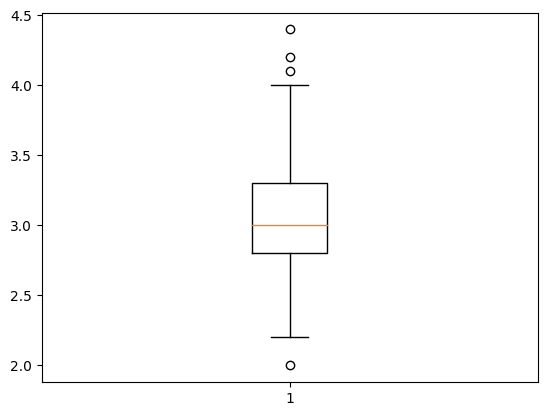

In [5]:
plt.boxplot(df['sepal_width'])
plt.show()

In [6]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

In [7]:
lb = Q1 - (1.5 * IQR)
ub = Q3 + (1.5 * IQR)
df = df[(df['sepal_width'] > lb) & (df['sepal_width'] < ub)]

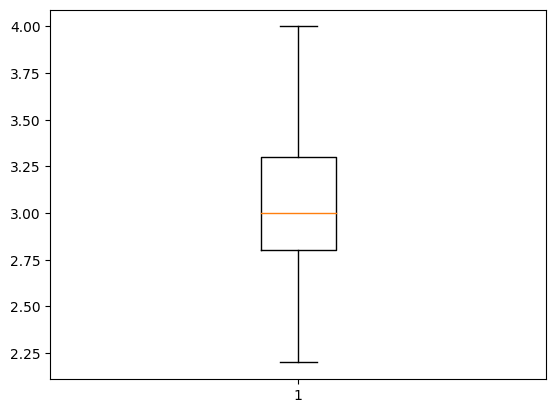

In [8]:
plt.boxplot(df['sepal_width'])
plt.show()

In [9]:
ivi = df[df['species'] == 'Iris-virginica']
ive = df[df['species'] == 'Iris-versicolor']
ivs = df[df['species'] == 'Iris-setosa']

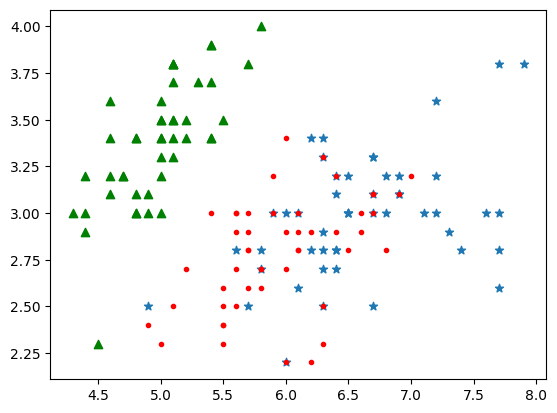

In [10]:
plt.scatter(ivi['sepal_length'], ivi['sepal_width'], marker = '*')
plt.scatter(ive['sepal_length'], ive['sepal_width'], marker = '.', color = 'red')
plt.scatter(ivs['sepal_length'], ivs['sepal_width'], marker = '^', color = 'green')

In [11]:
def target(value):
    if value == 'Iris-virginica':
        return 0
    elif value == 'Iris-versicolor':
        return 1
    else:
        return 2

In [12]:
df['target'] = df['species'].apply(target)

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2


In [14]:
df.drop('species', axis = 1, inplace = True)

In [15]:
x = np.array(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(df[['target']])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)

In [17]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)

In [18]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
y_predict = model.predict(x_test)
y_predict

array([1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2],
      dtype=int64)

In [20]:
labels = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

In [21]:
cm = confusion_matrix(y_test, y_predict)

Text(50.72222222222221, 0.5, 'Actual')

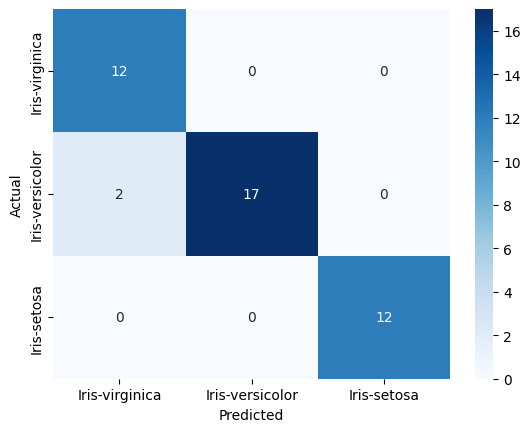

In [22]:
import seaborn as sns
sns.heatmap(cm, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [24]:
print("Accuracy Score:", accuracy_score(y_test, y_predict))
print("Precision Score:", precision_score(y_test, y_predict, average="micro"))
print("Recall Score:", recall_score(y_test, y_predict, average = "macro"))
print("F1-Score:", f1_score(y_test, y_predict, average="macro"))


Accuracy Score: 0.9534883720930233
Precision Score: 0.9534883720930233
Recall Score: 0.9649122807017544
F1-Score: 0.9558404558404558


In [25]:
for i in range(len(y_predict)):
    if(y_predict[i] == 2):
        y_predict[i] = 1
    if(y_test[i] == 2):
        y_test[i] = 1

In [26]:
fpr, tpr, threshold = roc_curve(y_test, y_predict)
auc = auc(fpr, tpr)

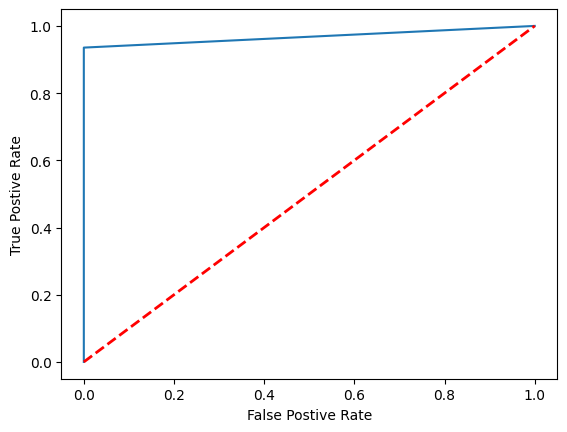

In [27]:
plt.plot(fpr, tpr, linestyle = '-', label = 'KNN (auc = %0.3f)'%auc)
plt.plot([0,1], [0,1], color = 'red', linewidth = 2, linestyle = '--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.show()